In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

### Read input data (depth camera)

In [3]:
# read video frame
def dep_cam(dep_v_name):
    dep_v = cv2.VideoCapture(dep_v_name)
    ret, frame = dep_v.read()
    counter=0

    frame_count = int(dep_v.get(cv2.CAP_PROP_FRAME_COUNT))

    # frame_height = int(frame.shape[0]/5)
    # frame_width = int(frame.shape[1]/5)
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]
    depth_frames = np.empty((frame_count, frame_height, frame_width))

    while(dep_v.isOpened()):
        ret, frame = dep_v.read()
        if ret == False:
            break
        if ret == True:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray_frame = cv2.resize(gray_frame, (frame_width, frame_height), interpolation = cv2.INTER_AREA)
            depth_frames[counter] = gray_frame
            counter+=1

    dep_v.release()
    cv2.destroyAllWindows()
    return depth_frames

In [4]:
# read output angle data
foldername = r'Test_Subject_Leo/'
test_folder = ['test13', 'test14', 'test15', 'test16', 'test24' ]
test_num = ['13', '14', '15', '16', '24']
sub_name = foldername + test_folder[4]
dep_name = sub_name + r'/depth_processed_leo_test' + test_num[4] + '.avi';
depth =  dep_cam(dep_name)
for i in range(4):
    subfolder_name = foldername + test_folder[i]
    dep_video_name = subfolder_name + r'/depth_processed_leo_test' + test_num[i] + '.avi'
    dep_v_temp =  dep_cam(dep_video_name)
    depth = np.concatenate((depth, dep_v_temp))

In [18]:
print(depth.shape)

(19172, 120, 160)


(19172, 120, 160)


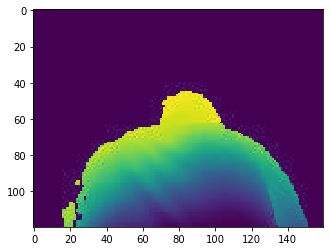

In [5]:
print(depth.shape)

# plot one single frame
plt.imshow(depth[5000], interpolation='nearest')
plt.show()

### Read output data (angle)

In [5]:
subfolder_name = foldername + test_folder[4]
qtm_file = subfolder_name + r'/qtm_processed_leo_test' + test_num[4] + '_' + '11_15_2020' + '.txt'
theta_z = pd.read_csv(qtm_file)
theta_z = theta_z.iloc[:,0].values
for i in range(4):
    subfolder_name = foldername + test_folder[i]
#     if test_folder[i] == 'test24':
#         qtm_file = subfolder_name + r'/qtm_processed_leo_test' + test_num[i] + '_' + '11_15_2020' + '.txt'
#     else: 
    qtm_file = subfolder_name + r'/qtm_processed_leo_test' + test_num[i] + '_' + '11_11_2020' + '.txt'
    dataset_y =  pd.read_csv(qtm_file)
    theta_z_temp = dataset_y.iloc[:,0].values
    theta_z = np.concatenate((theta_z, theta_z_temp))

In [21]:
depth_flatten = depth.reshape(19200, 19172).T
print(depth_flatten.shape)

(19172, 19200)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(depth, theta_z, test_size = 0.2, random_state = 0)

In [18]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# Xtrain = sc.transform(X_train)
# Xtest = sc.transform(X_test)

<ipython-input-26-3b6c84856f38>:40: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-Z))
<ipython-input-26-3b6c84856f38>:44: RuntimeWarning: divide by zero encountered in log
  loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
<ipython-input-26-3b6c84856f38>:76: RuntimeWarning: divide by zero encountered in true_divide
  dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
<ipython-input-26-3b6c84856f38>:76: RuntimeWarning: overflow encountered in true_divide
  dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
<ipython-input-26-3b6c84856f38>:78: RuntimeWarning: invalid value encountered in multiply
  dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig


ValueError: shapes (15337,15337) and (1,8) not aligned: 15337 (dim 1) != 1 (dim 0)

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 160)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', 
              loss= 'mae',
              metrics=['mae'])

model.fit(X_train, y_train,epochs=50)

Epoch 1/50
480/480 [==============================] - 5s 11ms/step - loss: 28.6005 - mae: 28.6005
Epoch 2/50
480/480 [==============================] - 5s 11ms/step - loss: 10.6964 - mae: 10.6964
Epoch 3/50
480/480 [==============================] - 5s 11ms/step - loss: 9.8140 - mae: 9.8140
Epoch 4/50
480/480 [==============================] - 5s 11ms/step - loss: 8.9401 - mae: 8.9401
Epoch 5/50
480/480 [==============================] - 5s 11ms/step - loss: 8.7499 - mae: 8.7499
Epoch 6/50
480/480 [==============================] - 5s 11ms/step - loss: 8.6536 - mae: 8.6536
Epoch 7/50
480/480 [==============================] - 5s 11ms/step - loss: 8.7076 - mae: 8.7076
Epoch 8/50
480/480 [==============================] - 5s 11ms/step - loss: 8.6331 - mae: 8.6331
Epoch 9/50
480/480 [==============================] - 5s 11ms/step - loss: 8.6058 - mae: 8.6058
Epoch 10/50
480/480 [==============================] - 5s 11ms/step - loss: 8.5283 - mae: 8.5283
Epoch 11/50
480/480 [==============

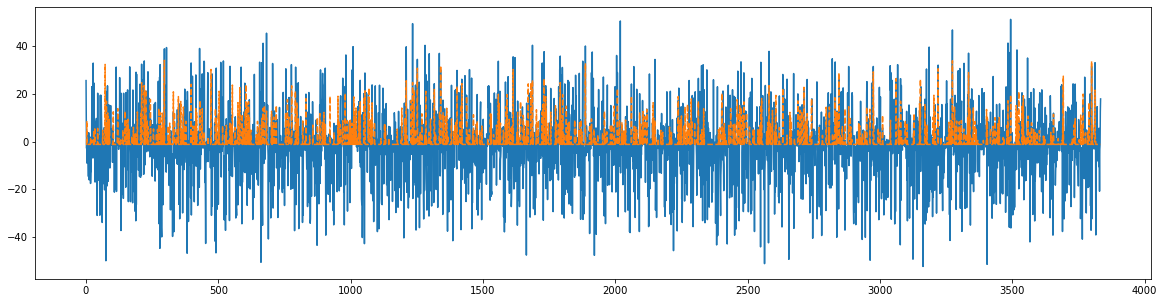

In [17]:
y_prediction = model.predict(X_test)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
plt.plot(y_test)
plt.plot(y_prediction,'--')

In [ ]:
# use sklearn neural network model
from sklearn.neural_network import MLPRegressor



In [18]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 160)),
    tf.keras.layers.Dense(units=256, activation='tanh'),
    tf.keras.layers.Dense(units=192, activation='tanh'),
    tf.keras.layers.Dense(units=128, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', 
              loss= 'mse',
              metrics=['mse'])

model.fit(X_train, y_train,epochs=50)

Epoch 1/50
480/480 [==============================] - 5s 11ms/step - loss: 190.9696 - mse: 190.9696
Epoch 2/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8036 - mse: 190.8036
Epoch 3/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8086 - mse: 190.8086
Epoch 4/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8673 - mse: 190.8673
Epoch 5/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8289 - mse: 190.8289
Epoch 6/50
480/480 [==============================] - 5s 11ms/step - loss: 190.5984 - mse: 190.5984
Epoch 7/50
480/480 [==============================] - 5s 11ms/step - loss: 190.7801 - mse: 190.7801
Epoch 8/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8795 - mse: 190.8795
Epoch 9/50
480/480 [==============================] - 5s 11ms/step - loss: 190.8846 - mse: 190.8846
Epoch 10/50
480/480 [==============================] - 5s 11ms/step - loss: 190.7903 - mse: 190.7903

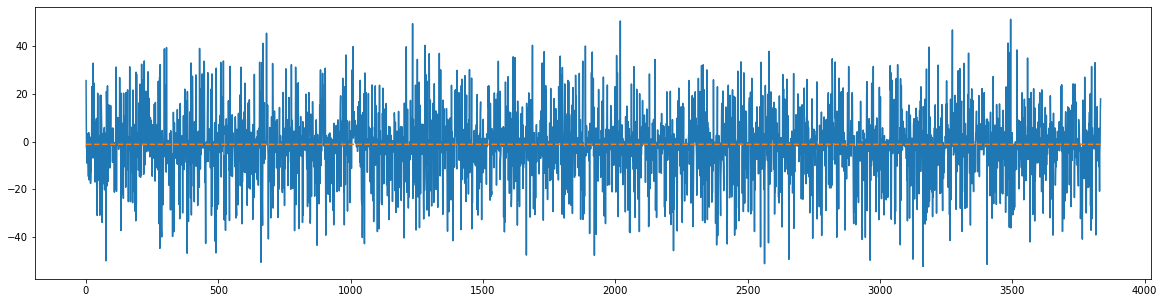

In [19]:
y_prediction = model.predict(X_test)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
plt.plot(y_test)
plt.plot(y_prediction,'--')

In [20]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 160)),
    tf.keras.layers.Dense(units=256, activation='tanh'),
    tf.keras.layers.Dense(units=192, activation='tanh'),
    tf.keras.layers.Dense(units=128, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', 
              loss= 'mae',
              metrics=['mae'])

model.fit(X_train, y_train,epochs=50)

Epoch 1/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4601 - mae: 9.4601
Epoch 2/50
480/480 [==============================] - 6s 12ms/step - loss: 9.4605 - mae: 9.4605
Epoch 3/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4814 - mae: 9.4814
Epoch 4/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4832 - mae: 9.4832
Epoch 5/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4891 - mae: 9.4891
Epoch 6/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4869 - mae: 9.4869
Epoch 7/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4863 - mae: 9.4863
Epoch 8/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4874 - mae: 9.4874
Epoch 9/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4870 - mae: 9.4870
Epoch 10/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4891 - mae: 9.4891
Epoch 11/50
480/480 [==================

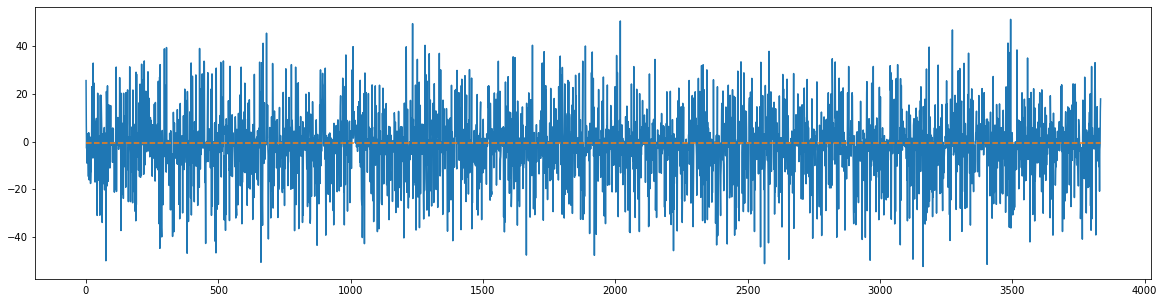

In [21]:
y_prediction = model.predict(X_test)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
plt.plot(y_test)
plt.plot(y_prediction,'--')

In [22]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 160)),
    tf.keras.layers.Dense(units=256, activation='sigmoid'),
    tf.keras.layers.Dense(units=192, activation='sigmoid'),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', 
              loss= 'mae',
              metrics=['mae'])

model.fit(X_train, y_train,epochs=50)

Epoch 1/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4788 - mae: 9.4788
Epoch 2/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4856 - mae: 9.4856
Epoch 3/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4866 - mae: 9.4866
Epoch 4/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4872 - mae: 9.4872
Epoch 5/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4851 - mae: 9.4851
Epoch 6/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4840 - mae: 9.4840
Epoch 7/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4842 - mae: 9.4842
Epoch 8/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4858 - mae: 9.4858
Epoch 9/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4847 - mae: 9.4847
Epoch 10/50
480/480 [==============================] - 5s 11ms/step - loss: 9.4860 - mae: 9.4860
Epoch 11/50
480/480 [==================

### Comments:

###### Observation: Comparing to the NN that uses tanh and sigmoid activation function, the rectified linear unit fucntion seemed to have better performance (lower mae) when the layers number are the same. Also, the choice of metrics of model evaluation seemed to be important (mse is quite large compared to mae). But I wonder what happened to my plots ;(     

###### Also, right now I am using a dimension of 120 * 160, performing a dimensionality reduction could be helpful for extracting necessary features. A longer epoch time may also improve performance. Tried sklearn neural network MLPRegressor but does not work